# Suboptimility vs. $\epsilon$

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

Definition of suboptimality function:

$$ Sub(\epsilon) = W_{2, \epsilon}^2(\rho, \mu) - W_{2}^2(\rho, \mu) = 8 \int_0^\infty \frac{x}{1 + e^{4x/\epsilon}} \rho(x) dx.$$

In [2]:
def suboptimality(eps, rho, M):
    f = lambda x: 8 * x/(1 + np.exp(4*x/eps)) * rho(x)
    return quad(f, 0, M, epsabs=1e-30, epsrel=1e-30)[0] #quad(f, 0, M, epsabs=1e-10, epsrel=1e-10)[0]

Definition of asymptotic:
$$ Asymp(\epsilon) = \frac{\pi^2 \rho(0)}{24} \epsilon^2. $$

In [3]:
def asymp(eps, rho):
    return np.pi**2 * rho(0) *eps**2 / 24

## Rescaled Gaussian

Definition of source:
$$\rho(x) = \frac{1}{Z}e^{-x^2/\sigma^2} \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0000000000000002


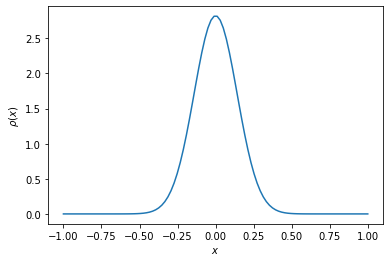

In [4]:
sigma = 0.2
M = 1

f = lambda u: np.exp(-u**2/sigma**2)
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-gaussian.pdf', bbox_inches='tight') 
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from th

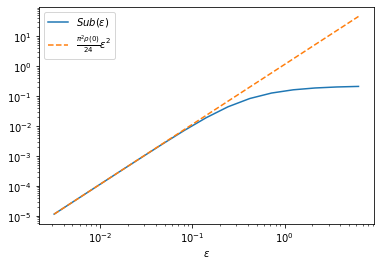

In [5]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-gaussian.pdf', bbox_inches='tight')  
plt.show()

Plot of (asymptotic - suboptimality):

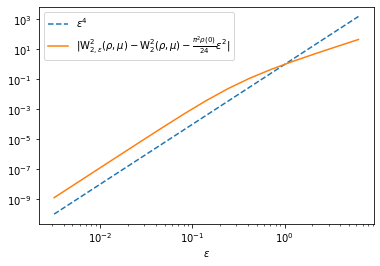

In [6]:
comparison = np.array([eps**4 for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^4$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-gaussian.pdf', bbox_inches='tight')
plt.show()

## Rescaled Laplacian

Definition of source $\rho$:
$$\rho(x) = \frac{1}{Z}e^{-|x|} \mathbb{1}_{[-M, M]}(x) $$

Integral over [-M, M]: 0.9999999999999998


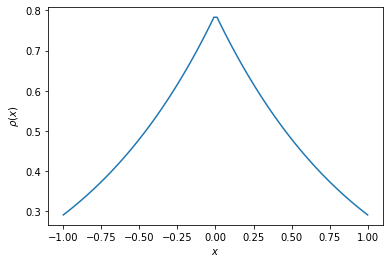

In [7]:
M = 1

f = lambda u: np.exp(-np.abs(u))
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-laplace.pdf', bbox_inches='tight')
plt.show()

Plot of suboptimality vs. asymptotic functions:

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


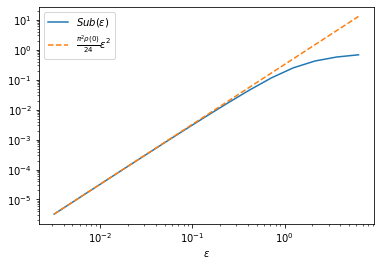

In [8]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-laplace.pdf', bbox_inches='tight')  
plt.show()

Plot of (asymptotic - suboptimality):

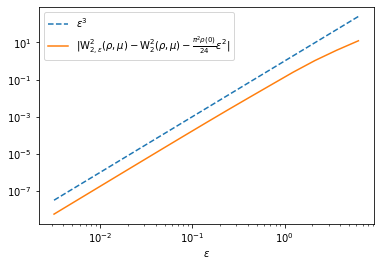

In [9]:
comparison = np.array([eps**3 for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^3$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-laplace.pdf', bbox_inches='tight')
plt.show()

## $\frac{1}{2}$-Hölder source

Definition of source:
$$\rho(x) = \frac{1}{Z}(1 - |x|^{1/2}) \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0


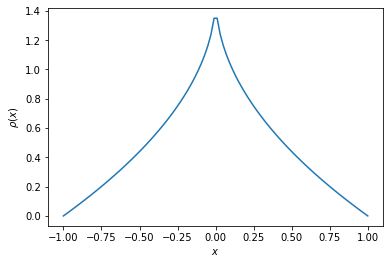

In [10]:
sigma = 2
M = 1

f = lambda u: 1 - np.sqrt(np.abs(u))
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-sqrt.pdf', bbox_inches='tight') 
plt.show()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from th

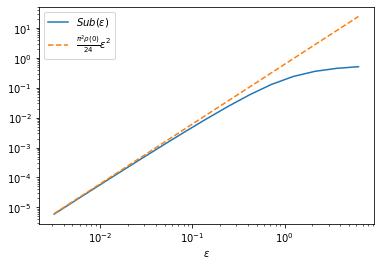

In [11]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-sqrt.pdf', bbox_inches='tight')
plt.show()

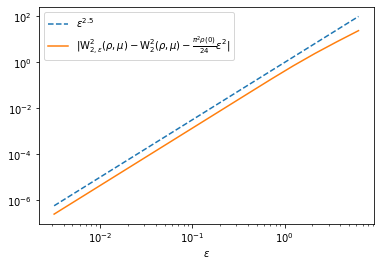

In [12]:
comparison = np.array([eps**(2.5) for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^{2.5}$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-sqrt.pdf', bbox_inches='tight')  
plt.show()

## Lebesgue

Definition of source:
$$\rho(x) = \frac{1}{Z} \mathbb{1}_{[-M, M]}(x). $$

Integral over [-M, M]: 1.0


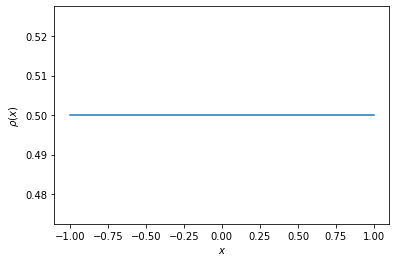

In [13]:
M = 1

f = lambda u: np.ones_like(u)
int_f = quad(f, -M, M, epsabs=1e-10, epsrel=1e-10)[0]

def rho(x):    
    return f(x)/int_f

print(r"Integral over [-M, M]:", quad(rho, -M, M)[0])

xx = np.linspace(-M, M, 100)
plt.plot(xx, rho(xx))
plt.xlabel("$x$")
plt.ylabel(r"$\rho(x)$")
plt.savefig('density-lebesgue.pdf', bbox_inches='tight')
plt.show()

/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/home/alex/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  This is separate from the ipykernel package so we can avoid doing imports until


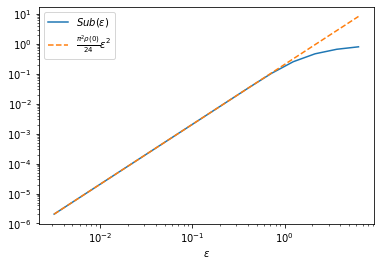

In [14]:
epsilons = np.logspace(-2.5, 0.8, 15)

suboptimalities = np.array([suboptimality(eps, rho, M) for eps in epsilons])
asymps = np.array([asymp(eps, rho) for eps in epsilons])

plt.loglog(epsilons, suboptimalities, label=r"$Sub(\epsilon)$")
plt.loglog(epsilons, asymps, "--", label=r"$\frac{\pi^2 \rho(0)}{24}\epsilon^2$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('asymptotics-lebesgue.pdf', bbox_inches='tight')
plt.show()

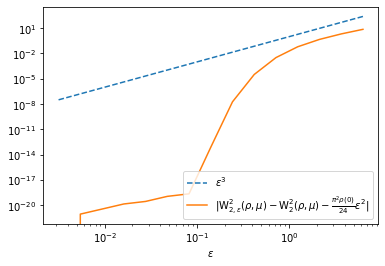

In [15]:
comparison = np.array([eps**(3) for eps in epsilons])
plt.loglog(epsilons, comparison, "--", label=r"$\epsilon^{3}$")

plt.loglog(epsilons, np.abs(asymps - suboptimalities),\
           label=r"$\vert \mathrm{W}_{2,\epsilon}^2(\rho, \mu) - \mathrm{W}_{2}^2(\rho, \mu) - \frac{\pi^2 \rho(0)}{24}\epsilon^2 \vert$")
plt.xlabel(r"$\epsilon$")
plt.legend()
plt.savefig('cv-rate-to-asymptotic-lebesgue.pdf', bbox_inches='tight')
plt.show()